Bounding Box:
Xmin: 444848.1698217626
Xmax: 444858.1977170456
Ymin: 5792685.417262023
Ymax: 5792695.858025149


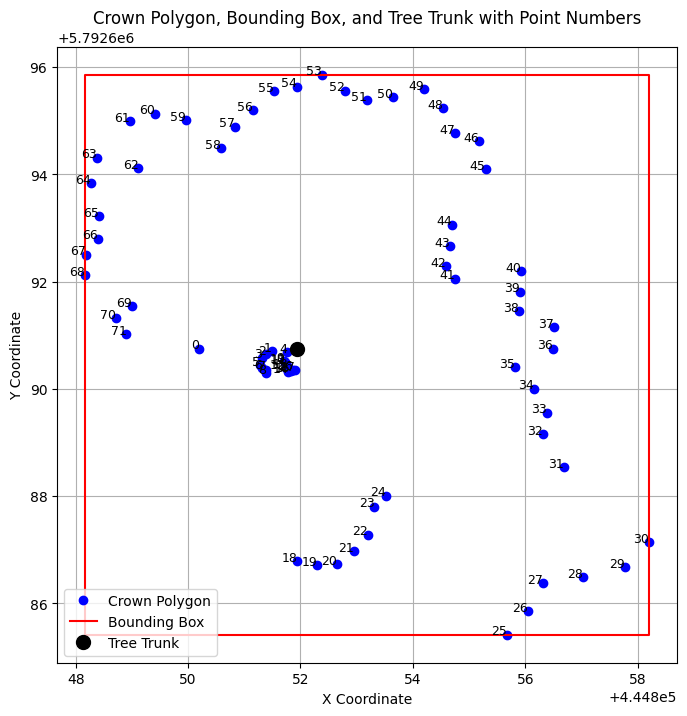

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def create_bounding_box(crown_polygon, ground_height_circle):
    sector_count = 72
    sector_angle = 2 * np.pi / sector_count

    # Adjust angles so that the first index points to negative x direction
    angles = np.arange(np.pi, 3 * np.pi, sector_angle)
    
    x_coords = []
    y_coords = []

    for i, distance in enumerate(crown_polygon):
        angle = angles[i]
        x = distance * np.cos(angle) + ground_height_circle['x']
        y = distance * np.sin(angle) + ground_height_circle['y']
        x_coords.append(x)
        y_coords.append(y)
    
    # Create bounding box
    xmin = min(x_coords)
    xmax = max(x_coords)
    ymin = min(y_coords)
    ymax = max(y_coords)
    
    return xmin, xmax, ymin, ymax, x_coords, y_coords

# Sample input data
crown_polygon = [
    1.7415436394627841, 0.45601390748167825, 0.5652861107894824, 0.6477758737065759,
    0.19479204292999877, 0.7283687687132725, 0.7319720025819307, 0.6831347943884167,
    0.7201304335647339, 0.32180311065958944, 0.3351272566102926, 0.34082349222018105,
    0.41184628837729026, 0.3720767304575501, 0.46743219026431065, 0.43851076755857765,
    0.39838208258264024, 0.3966842283346838, 3.9638302259557223, 4.044167514742917,
    4.075322948929477, 3.905188913550009, 3.6882457139576585, 3.2496450012954456,
    3.1659542433913, 6.51104082552721, 6.3846736903034875, 6.18094019547316,
    6.635116679394277, 7.1083187900717375, 7.223637464265023, 5.236441284515867,
    4.646529319713287, 4.603511688990121, 4.280738479347974, 3.8957984809215476,
    4.541764537320919, 4.591328721495137, 4.013852046638012, 4.101718972072638,
    4.239765576869887, 3.09147619135616, 3.0652492056237026, 3.320710539042518,
    3.5989073951095607, 4.73876744619167, 5.042446048691932, 4.898595446656932,
    5.185161628376563, 5.333941088425965, 4.995998960365992, 4.793216327407479,
    4.885327071627314, 5.126739515181219, 4.88642220213453, 4.814045716446036,
    4.519433042145146, 4.287674983500969, 3.986040874082964, 4.698032531700883,
    5.061075140177845, 5.175932536901533, 4.394011355161191, 5.035091671201709,
    4.799881624464174, 4.299639068886189, 4.101491399111789, 4.148499113265108,
    4.0141229671935355, 3.0370512649297954, 3.2766227319124566, 3.0500237666688017
]

ground_height_circle = {
    "radius": None,
    "x": 444851.9418634938,
    "y": 5792690.750794426
}

# Calculate bounding box
xmin, xmax, ymin, ymax, x_coords, y_coords = create_bounding_box(crown_polygon, ground_height_circle)

print(f"Bounding Box:")
print(f"Xmin: {xmin}")
print(f"Xmax: {xmax}")
print(f"Ymin: {ymin}")
print(f"Ymax: {ymax}")

# Plotting the bounding box, crown polygon, and tree trunk
plt.figure(figsize=(8, 8))
plt.plot(x_coords, y_coords, 'bo', label='Crown Polygon')

# Plotting bounding box
plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'r-', label='Bounding Box')

# Plotting tree trunk
plt.plot(ground_height_circle['x'], ground_height_circle['y'], 'ko', markersize=10, label='Tree Trunk')

# Adding numbered points
for i, (x, y) in enumerate(zip(x_coords, y_coords)):
    plt.text(x, y, str(i), fontsize=9, ha='right')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Crown Polygon, Bounding Box, and Tree Trunk with Point Numbers')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()